In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import set_config
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

## **Introduction** ⌨
This dataset extracted from Kaggle represents a binary classification problem when looking for the prediction of insurance leads. If the customer completes the form to apply for the policy he is considered as a potential customer (positive result), otherwise not (negative result).

From this dataset, an initial cleaning and exploration of the data is performed, to then apply different classification models that allow companies to identify which customers are potential customers to purchase a health insurance policy.




In [ ]:
df = pd.read_csv('/content/Health Insurance Lead Prediction Raw Data.csv')
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [ ]:
df.duplicated().sum() #Identification of duplicates

0

In [ ]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
df["City_Code"].value_counts()

C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64

In [ ]:
df["Region_Code"].unique()

array([3213, 1117, 3732, ..., 5326, 6149, 5450])

In [ ]:
df["Accomodation_Type"].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [ ]:
df["Reco_Insurance_Type"].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

In [ ]:
df["Is_Spouse"].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

In [ ]:
df["Health Indicator"].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [ ]:
df["Holding_Policy_Duration"].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [ ]:
df["Holding_Policy_Type"].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [ ]:
df["Reco_Policy_Cat"].value_counts()

22    6602
18    5553
21    5027
16    4084
17    3756
19    3708
20    3177
12    2168
1     1967
2     1917
14    1742
13    1684
15    1615
3     1059
4     1015
5     1007
6      851
7      834
9      789
11     781
8      776
10     770
Name: Reco_Policy_Cat, dtype: int64

In [ ]:
df["Reco_Policy_Premium"].unique()

array([11628., 30510.,  7450., ..., 25726.,  6156., 11374.])

In [ ]:
df.drop('ID', axis = 1, inplace = True)

In [ ]:
df['Health Indicator'].fillna(df['Health Indicator'].mode()[0], inplace = True)
df['Health Indicator'].isnull().sum()

0

In [ ]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace({'14+':'15'}) # 15 = >14
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype(float)

In [ ]:
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].median(), inplace = True)
df['Holding_Policy_Duration'].isnull().sum()

0

In [ ]:
df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].median(), inplace=True)
df['Holding_Policy_Type'].isnull().sum()

0

In [ ]:
df['City_Code'] = df['City_Code'].apply(lambda x : x[1:]) #Replace the data with numbers only, to facilitate the modeling process
df['City_Code'] = df['City_Code'].astype(int)

In [ ]:
df['Health Indicator'] = df['Health Indicator'].map({'X1':'1', 'X2':'2', 'X3':'3', 'X4':'4', 'X5':'5', 'X6':'6','X7':'7', 'X8':'8','X9':'9'})#Replace the data with numbers only, to facilitate the modeling process
df['Health Indicator'] = df['Health Indicator'].astype(float)

In [ ]:
df['Is_Spouse'].replace(('Yes','No'), (1,0), inplace = True)
df['Reco_Insurance_Type'].replace(('Individual', 'Joint'), (1,0), inplace = True)
df['Accomodation_Type'].replace(('Owned','Rented'), (0,1), inplace = True)

In [ ]:
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,3,3213,1,1,36,36,0,1.0,15.0,3.0,22,11628.0,0
1,5,1117,0,0,75,22,0,2.0,5.0,3.0,22,30510.0,0
2,5,3732,0,1,32,32,0,1.0,1.0,1.0,19,7450.0,1
3,24,4378,0,0,52,48,0,1.0,15.0,3.0,19,17780.0,0
4,8,2190,1,1,44,44,0,2.0,3.0,1.0,16,10404.0,0


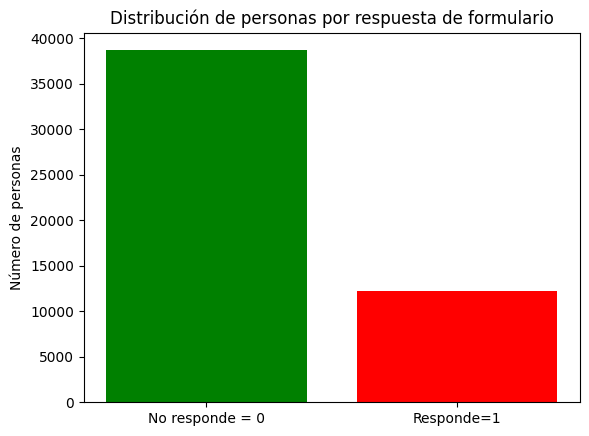

In [ ]:
# EXPLORATION GRAPHS
counts = df['Response'].value_counts()
fig, ax = plt.subplots()
ax.bar(['No responde = 0', 'Responde=1'], counts, color=['green', 'red'])
ax.set_ylabel('Número de personas')
ax.set_title('Distribución de personas por respuesta de formulario')
plt.show()
#This graph shows that the data in Response are unbalanced, there is 0= 38673 and 1= 12209, so it is advisable to take into account other metrics besides accuracy, since this is not the most appropriate to determine the quality of a model in these situations.

In [ ]:
df["Response"].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

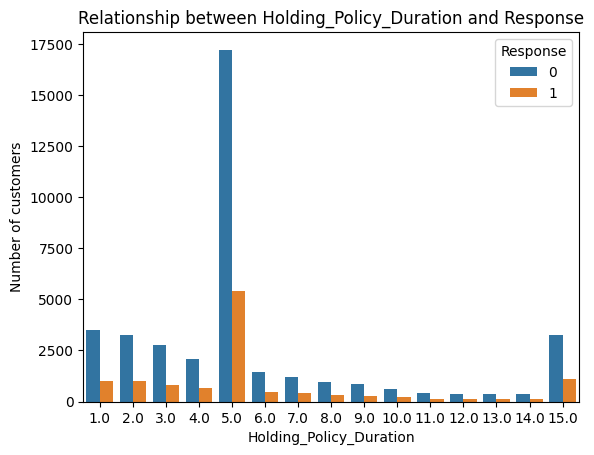

In [ ]:
ax = sns.countplot(x='Holding_Policy_Duration', hue='Response', data=df)
plt.xlabel('Holding_Policy_Duration')
plt.ylabel('Number of customers')
plt.title('Relationship between Holding_Policy_Duration and Response')
plt.show()

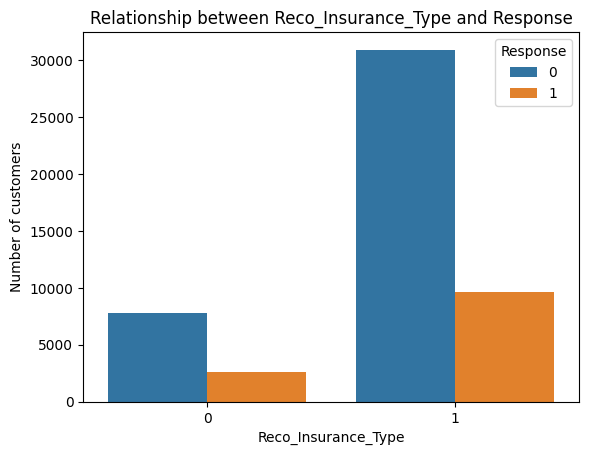

In [ ]:
ax = sns.countplot(x='Reco_Insurance_Type', hue='Response', data=df)
plt.xlabel('Reco_Insurance_Type')
plt.ylabel('Number of customers')
plt.title('Relationship between Reco_Insurance_Type and Response')
plt.show()

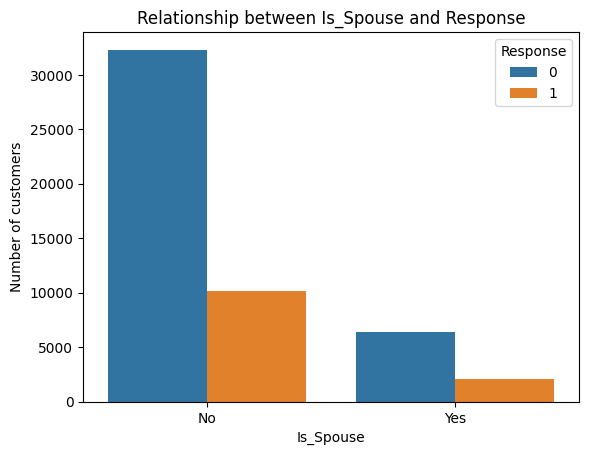

In [ ]:
ax = sns.countplot(x='Is_Spouse', hue='Response', data=df)
plt.xlabel('Is_Spouse')
plt.ylabel('Number of customers')
plt.title('Relationship between Is_Spouse and Response')
ax.set_xticklabels(['No', 'Yes'])
plt.show()

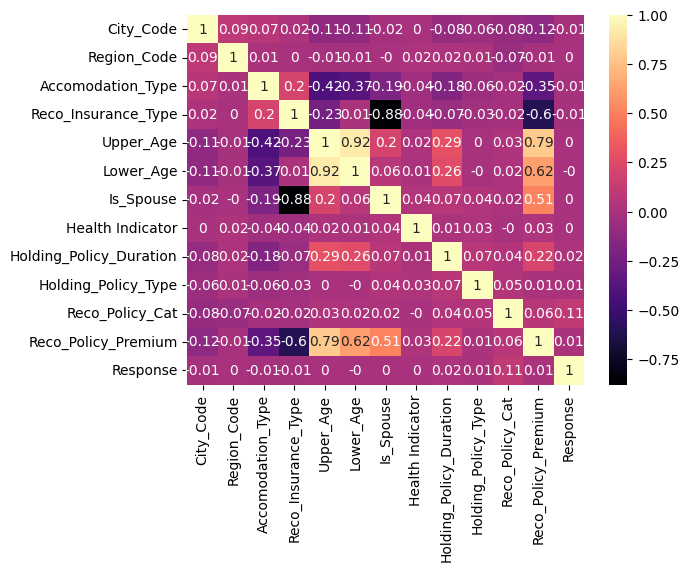

In [ ]:
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap="magma")
plt.show()

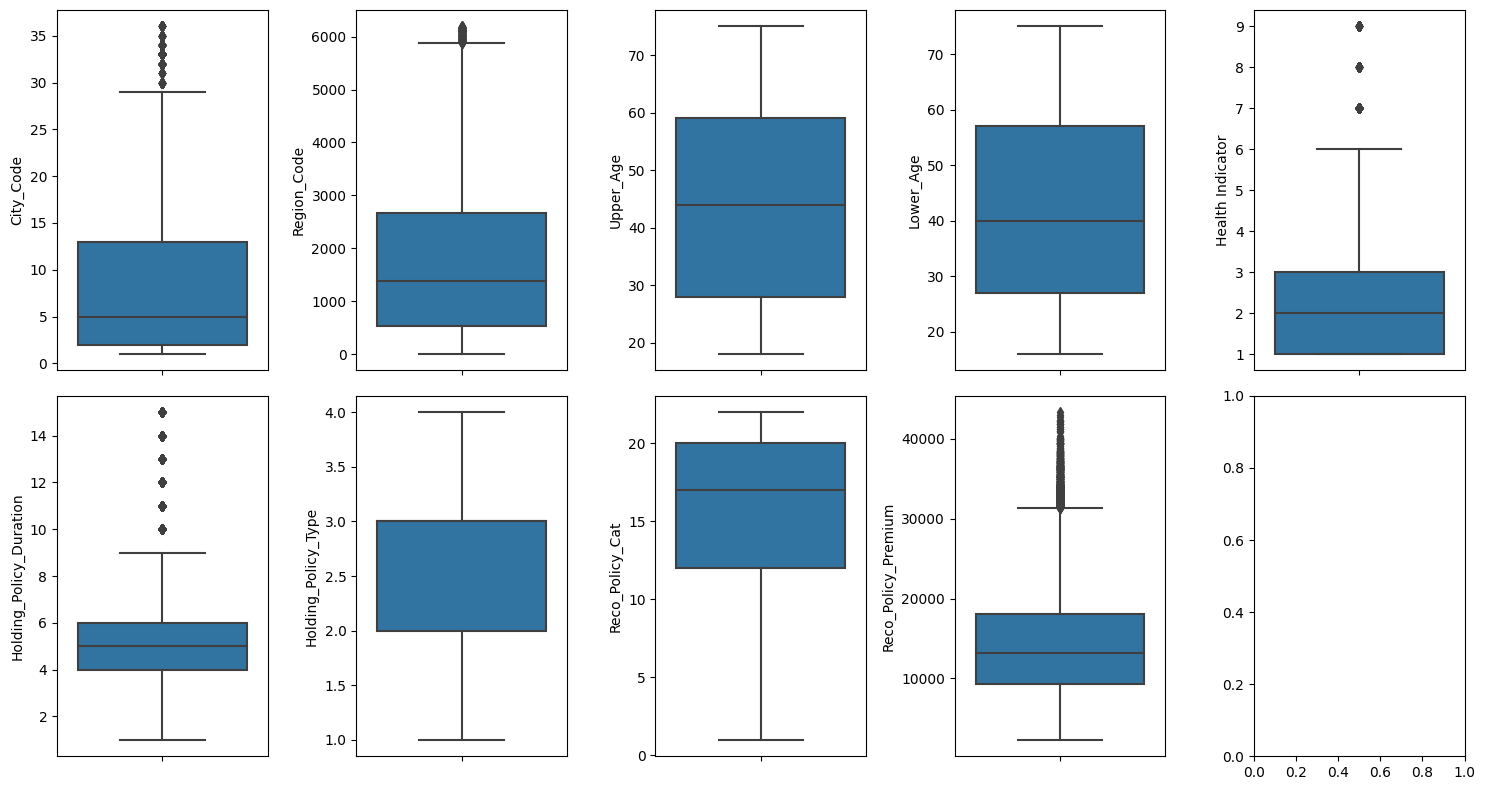

In [ ]:
variables = ['City_Code', 'Region_Code', 'Upper_Age', 'Lower_Age', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
for i, variable in enumerate(variables):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    sns.boxplot(data=df, y=variable, ax=ax)
    ax.set_ylabel(variable)
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  int64  
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  int64  
 3   Reco_Insurance_Type      50882 non-null  int64  
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  int64  
 7   Health Indicator         50882 non-null  float64
 8   Holding_Policy_Duration  50882 non-null  float64
 9   Holding_Policy_Type      50882 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 5.0 MB


In [ ]:
y = df['Response']
X = df.drop(columns = 'Response')

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
sm = SMOTE(random_state = 0)
X_resem , y_resem = sm.fit_resample(X_scaled, y)

In [ ]:
y_resem.value_counts()

0    38673
1    38673
Name: Response, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resem, y_resem, test_size = 0.2, random_state = 42)

### **KNN** 🔢

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.get_params()
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred = knn.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy in the training set (KNN):", accuracy_train)

Accuracy en el conjunto de entrenamiento (KNN): 0.8169080095675222


In [ ]:
y_test_pred = knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy in the test set (KNN):", accuracy_test)

Accuracy en el conjunto de prueba (KNN): 0.7232062055591467


In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

Matriz de Confusión:
[[4361 3389]
 [ 893 6827]]


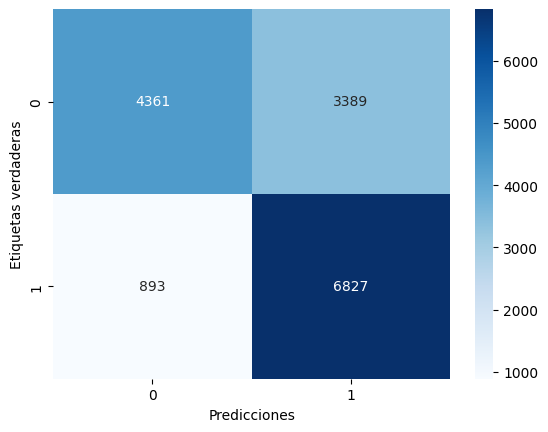

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predictions")
plt.ylabel("True labelss")
plt.show()
## There are 4361 true negatives, 6821 true positives, 893 false negatives and 3389 false positives.

In [ ]:
report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67      7750
           1       0.67      0.88      0.76      7720

    accuracy                           0.72     15470
   macro avg       0.75      0.72      0.72     15470
weighted avg       0.75      0.72      0.72     15470



### **RANDOM** **FOREST** 🌲

In [ ]:

rf = RandomForestClassifier(n_estimators=500, class_weight='balanced', max_depth = 30, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=500,
                       random_state=42)

In [ ]:
y_train_pred1 = rf.predict(X_train)
accuracy_train1 = accuracy_score(y_train, y_train_pred1)
print("Accuracy in the training set (RF):", accuracy_train1)

Accuracy en el conjunto de entrenamiento (RF): 0.9952647229943759


In [ ]:
y_test_pred1 = rf.predict(X_test)
accuracy_test1 = accuracy_score(y_test, y_test_pred1)
print("Accuracy in the test set (RF):", accuracy_test1)

Accuracy en el conjunto de prueba (RF): 0.8457013574660633


In [ ]:
cm1 = confusion_matrix(y_test, y_test_pred1)
print("Confusion Matrix:")
print(cm1)

Matriz de Confusión:
[[7186  564]
 [1823 5897]]


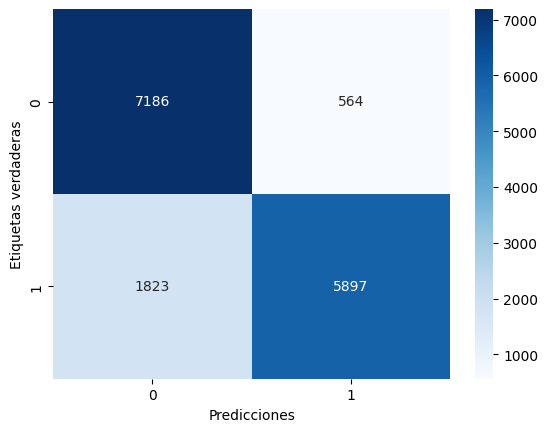

In [ ]:
sns.heatmap(cm1, annot=True, cmap="Blues", fmt="d", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas verdaderas")
plt.show()
## There are 7186 true negatives, 5897 true positives, 1823 false negatives and 564 false positives.

In [ ]:
report = classification_report(y_test, y_test_pred1)
print("Classification Report:")
print(report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      7750
           1       0.91      0.76      0.83      7720

    accuracy                           0.85     15470
   macro avg       0.86      0.85      0.84     15470
weighted avg       0.86      0.85      0.84     15470



### **Logistic Regression** 📉

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_train_pred2 = lr.predict(X_train)
accuracy_train2 = accuracy_score(y_train, y_train_pred2)
print("Accuracy in the training set (RL):", accuracy_train2)

Accuracy en el conjunto de entrenamiento (RL): 0.5432477858943694


In [ ]:
y_test_pred2 = lr.predict(X_test)
accuracy_test2 = accuracy_score(y_test, y_test_pred2)
print("Accuracy in the test set (RL):", accuracy_test2)

Accuracy en el conjunto de prueba (RL): 0.5442146089204912


In [ ]:
cm2 = confusion_matrix(y_test, y_test_pred2)
print("Confusion Matrix:")
print(cm2)

Matriz de Confusión:
[[3252 4498]
 [2553 5167]]


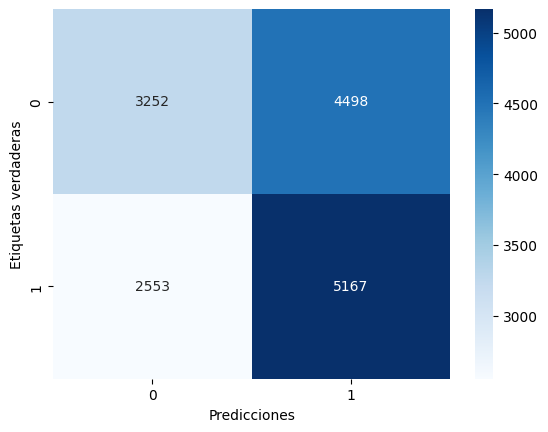

In [ ]:
sns.heatmap(cm2, annot=True, cmap="Blues", fmt="d", xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas verdaderas")
plt.show()
## There are 3252 true negatives, 5167 true positives, 2553 false negatives and 4498 false positives.

In [ ]:
report2 = classification_report(y_test, y_test_pred2)
print("Classification Report:")
print(report2)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.56      0.42      0.48      7750
           1       0.53      0.67      0.59      7720

    accuracy                           0.54     15470
   macro avg       0.55      0.54      0.54     15470
weighted avg       0.55      0.54      0.54     15470



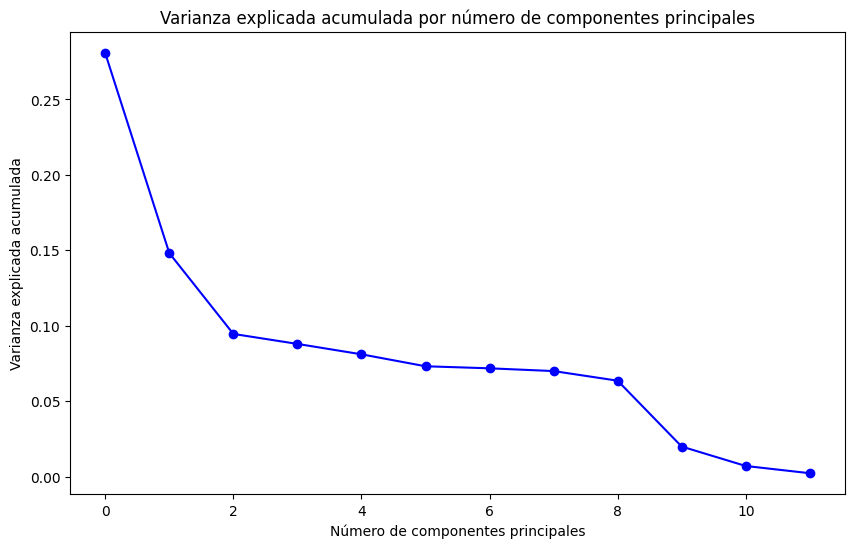

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

plt.figure(figsize=(10,6))
plt.plot(pca.explained_variance_ratio_,'bo-')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.show()

In [ ]:
pca2 = PCA()
X_train_pca2 = pca2.fit_transform(X_train)

In [ ]:
X_test_pca2 = pca2.transform(X_test)
X_test_pca2.shape

(15470, 12)

In [ ]:
input_shape = X_train_pca2.shape[1]
input_shape

12

# **Neural networks** 📔

# **Model** **1**

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=input_shape, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])
history = model.fit(X_train_pca2, y_train, validation_data=(X_test_pca2, y_test), epochs=80)

Epoch 1/80
1934/1934 [==============================] - 8s 4ms/step - loss: 0.6864 - accuracy: 0.5402 - precision: 0.5338 - recall: 0.6380 - val_loss: 0.6793 - val_accuracy: 0.5555 - val_precision: 0.5385 - val_recall: 0.7631
Epoch 2/80
1934/1934 [==============================] - 7s 4ms/step - loss: 0.6772 - accuracy: 0.5578 - precision: 0.5412 - recall: 0.7609 - val_loss: 0.6750 - val_accuracy: 0.5614 - val_precision: 0.5409 - val_recall: 0.8016
Epoch 3/80
1934/1934 [==============================] - 8s 4ms/step - loss: 0.6745 - accuracy: 0.5624 - precision: 0.5438 - recall: 0.7768 - val_loss: 0.6738 - val_accuracy: 0.5615 - val_precision: 0.5449 - val_recall: 0.7351
Epoch 4/80
1934/1934 [==============================] - 7s 3ms/step - loss: 0.6730 - accuracy: 0.5644 - precision: 0.5458 - recall: 0.7697 - val_loss: 0.6735 - val_accuracy: 0.5617 - val_precision: 0.5393 - val_recall: 0.8347
Epoch 5/80
1934/1934 [==============================] - 8s 4ms/step - loss: 0.6719 - accuracy: 0

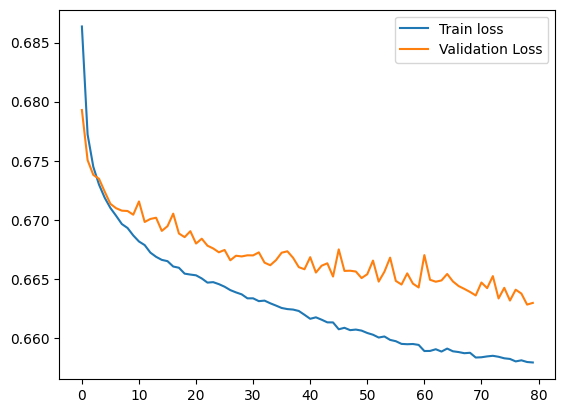

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend();

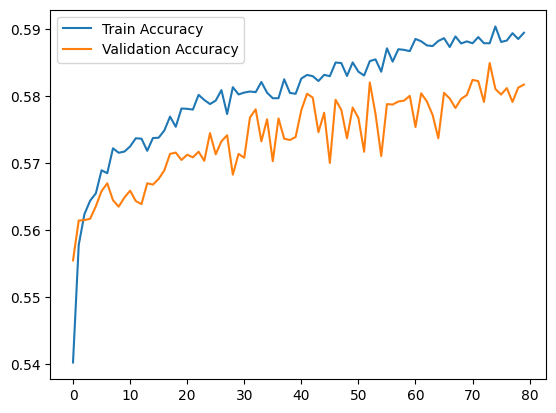

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

In [ ]:
loss, acc, precision, recall = model.evaluate(X_test_pca2, y_test, batch_size=32)
print("Loss", loss)
print ("Accuracy", acc)
print("Precision", precision)
print ("Recall", recall)

484/484 [==============================] - 1s 2ms/step - loss: 0.6630 - accuracy: 0.5817 - precision: 0.5618 - recall: 0.7350
Loss 0.662951648235321
Accuracy 0.5817065238952637
Precision 0.5618377923965454
Recall 0.7349740862846375


In [ ]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

0.6368482968042705

484/484 [==============================] - 1s 1ms/step


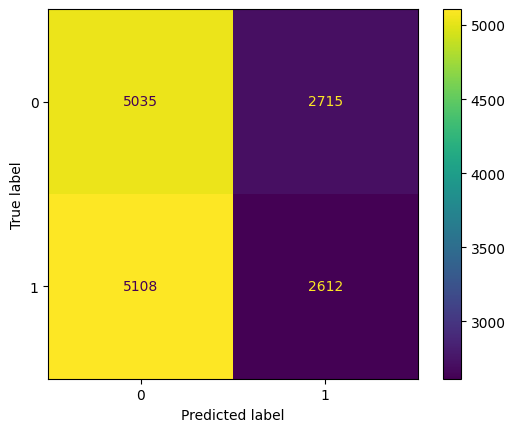

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

cm=confusion_matrix(y_test, y_pred_classes);
disp = ConfusionMatrixDisplay(confusion_matrix=cm);
disp.plot();
## There are 5035 true negatives, 2612 true positives, 5108 false negatives and 2715 false positives.

# **Model** **2**

In [ ]:
from tensorflow.keras.regularizers import l2
model1 = Sequential()
model1.add(Dense(12, input_dim=input_shape, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])
history1 = model1.fit(X_train_pca2, y_train, validation_data=(X_test_pca2, y_test), epochs=80)

Epoch 1/80
1934/1934 [==============================] - 7s 3ms/step - loss: 0.7263 - accuracy: 0.5427 - precision_1: 0.5332 - recall_1: 0.6899 - val_loss: 0.6900 - val_accuracy: 0.5471 - val_precision_1: 0.5360 - val_recall_1: 0.6881
Epoch 2/80
1934/1934 [==============================] - 6s 3ms/step - loss: 0.6895 - accuracy: 0.5532 - precision_1: 0.5384 - recall_1: 0.7486 - val_loss: 0.6897 - val_accuracy: 0.5602 - val_precision_1: 0.5376 - val_recall_1: 0.8484
Epoch 3/80
1934/1934 [==============================] - 5s 3ms/step - loss: 0.6884 - accuracy: 0.5562 - precision_1: 0.5398 - recall_1: 0.7661 - val_loss: 0.6875 - val_accuracy: 0.5628 - val_precision_1: 0.5410 - val_recall_1: 0.8177
Epoch 4/80
1934/1934 [==============================] - 7s 4ms/step - loss: 0.6876 - accuracy: 0.5574 - precision_1: 0.5396 - recall_1: 0.7843 - val_loss: 0.6871 - val_accuracy: 0.5529 - val_precision_1: 0.5376 - val_recall_1: 0.7449
Epoch 5/80
1934/1934 [==============================] - 6s 3ms/s

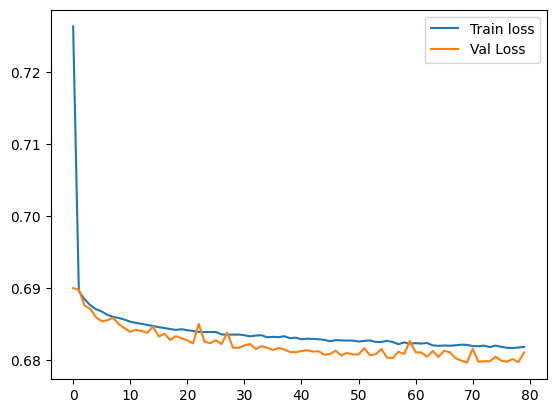

In [ ]:
plt.plot(history1.history['loss'], label='Train loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.legend();

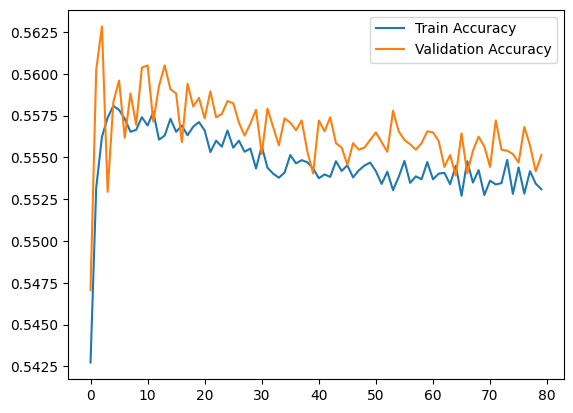

In [ ]:
# Visualizar el accuracy
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

In [ ]:
loss1, acc1, precision1, recall1 = model1.evaluate(X_test_pca2, y_test, batch_size=32)
print("Loss", loss1)
print ("Accuracy", acc1)
print("Precision", precision1)
print ("Recall", recall1)

484/484 [==============================] - 1s 2ms/step - loss: 0.6810 - accuracy: 0.5551 - precision_1: 0.5328 - recall_1: 0.8819
Loss 0.6810071468353271
Accuracy 0.5551390051841736
Precision 0.5327907204627991
Recall 0.8818652629852295


In [ ]:
f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1)
f1_score1

0.6642599109810748

484/484 [==============================] - 1s 1ms/step


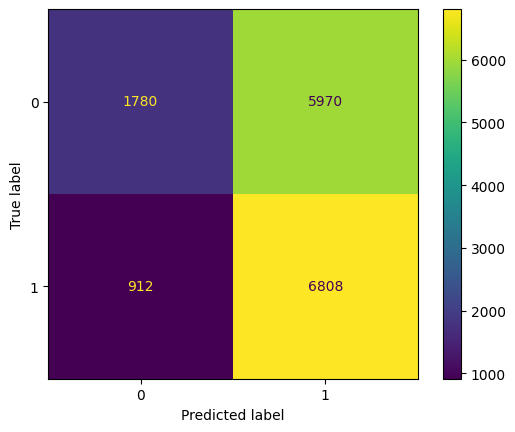

In [ ]:
y_pred1 = model1.predict(X_test_pca2)
y_pred_classes1 = np.round(y_pred1)

cm1=confusion_matrix(y_test, y_pred_classes1);
disp = ConfusionMatrixDisplay(confusion_matrix=cm1);
disp.plot();
## There are 1780 true negatives, 6808 true positives, 912 false negatives and 5970 false positives.

# **Model** **3**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model2 = Sequential()

model2.add(Dense(12, input_dim=input_shape, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(), metrics.Recall()])
early_stopping = EarlyStopping(patience = 5) # Number of iterations without improvement before stopping training
history2 = model2.fit(X_train_pca2, y_train, validation_data=(X_test_pca2, y_test), epochs=80, callbacks = [early_stopping])

Epoch 1/80
1934/1934 [==============================] - 8s 3ms/step - loss: 0.6783 - accuracy: 0.5540 - precision_2: 0.5383 - recall_2: 0.7613 - val_loss: 0.6753 - val_accuracy: 0.5601 - val_precision_2: 0.5377 - val_recall_2: 0.8438
Epoch 2/80
1934/1934 [==============================] - 5s 3ms/step - loss: 0.6741 - accuracy: 0.5625 - precision_2: 0.5411 - recall_2: 0.8254 - val_loss: 0.6719 - val_accuracy: 0.5613 - val_precision_2: 0.5388 - val_recall_2: 0.8382
Epoch 3/80
1934/1934 [==============================] - 5s 3ms/step - loss: 0.6727 - accuracy: 0.5651 - precision_2: 0.5432 - recall_2: 0.8214 - val_loss: 0.6715 - val_accuracy: 0.5648 - val_precision_2: 0.5398 - val_recall_2: 0.8671
Epoch 4/80
1934/1934 [==============================] - 6s 3ms/step - loss: 0.6714 - accuracy: 0.5664 - precision_2: 0.5439 - recall_2: 0.8255 - val_loss: 0.6686 - val_accuracy: 0.5652 - val_precision_2: 0.5418 - val_recall_2: 0.8338
Epoch 5/80
1934/1934 [==============================] - 6s 3ms/s

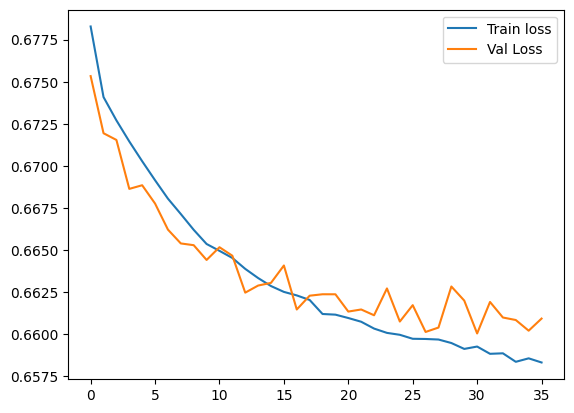

In [ ]:
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.legend();

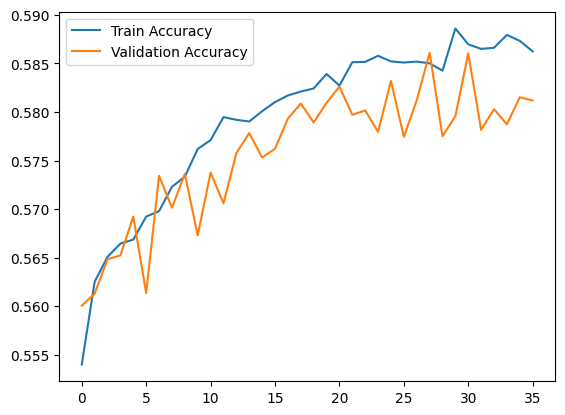

In [ ]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

In [ ]:
loss2, acc2, precision2, recall2 = model2.evaluate(X_test_pca2, y_test, batch_size=32)
print("Loss", loss2)
print ("Accuracy", acc2)
print("Precision", precision2)
print ("Recall", recall2)

484/484 [==============================] - 1s 2ms/step - loss: 0.6609 - accuracy: 0.5812 - precision_2: 0.5553 - recall_2: 0.8070
Loss 0.6609262824058533
Accuracy 0.5811893939971924
Precision 0.5553079843521118
Recall 0.8069947957992554


In [ ]:
f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)
f1_score2

0.6579016940538522

484/484 [==============================] - 1s 1ms/step


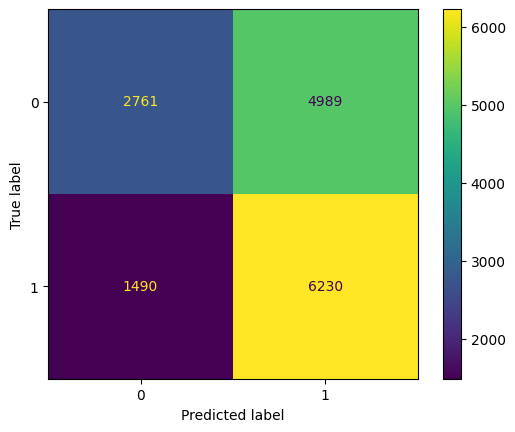

In [ ]:
y_pred2 = model2.predict(X_test_pca2)
y_pred_classes2 = np.round(y_pred2)

cm2=confusion_matrix(y_test, y_pred_classes2);
disp = ConfusionMatrixDisplay(confusion_matrix=cm2);
disp.plot();
# There are 2761 true negatives, 6230 true positives, 1490 false negatives and 4989 false positives.

## **Conclusion** ✍
According to the confusion matrices and the classification reports of each model, after using SMOTE (Synthetic Minority Over-sampling Technique) as a strategy to improve the unbalanced dataset KNN seems to be the best candidate, I conclude this for several reasons:

- It has the highest amount of true positives (6827) and the lowest amount of false negatives (893), this is important as it identifies a significant amount of potential customers and at the same time minimizes the error by having the lowest amount in FN.

- As for the classification report, the KNN model has the highest accuracy (81% train) and (73% test), however as mentioned above this metric is not the most important as it has an imbalance in the data.
However, the F1-Score (average of accuracy and recall) of KNN is the highest compared to the other models, since for class 0 I obtained 67% and for class 1 (potential customer) 76%.

By finding a strategy to improve the overall performance of all models, we were able to obtain better performance for all models, making it a useful tool that can be further improved, but it gives insurance companies more information on where they should direct their efforts to increase policy acquisition.
